In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [2]:
google = pd.read_csv('Data/GOOGL_2006-01-01_to_2018-01-01.csv',index_col = 'Date',parse_dates = ['Date'])
# instructing pandas to read 'Date' column as index and in date format

In [3]:
google.index


DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=3019, freq=None)

In [4]:
df = google['High']
df.index
#since this is univariate analysis I have taken one feature randomly to predict

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2017-12-15', '2017-12-18', '2017-12-19', '2017-12-20',
               '2017-12-21', '2017-12-22', '2017-12-26', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=3019, freq=None)

<AxesSubplot:xlabel='Date'>

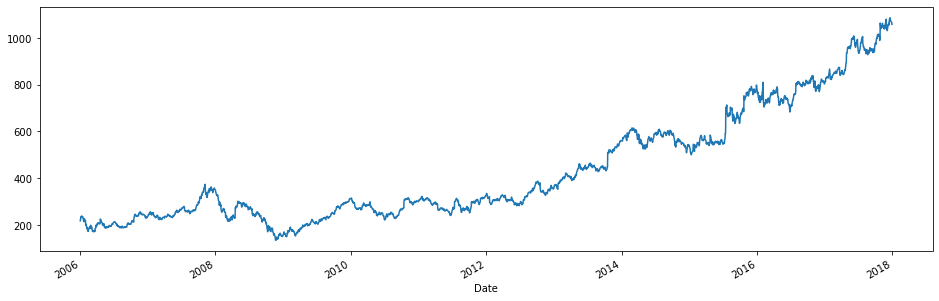

In [5]:
plt.figure(figsize=(16,5))
df.plot()

In [6]:
df.describe()

count    3019.000000
mean      431.835618
std       237.514087
min       134.820000
25%       250.190000
50%       312.810000
75%       575.975000
max      1086.490000
Name: High, dtype: float64

<AxesSubplot:xlabel='High'>

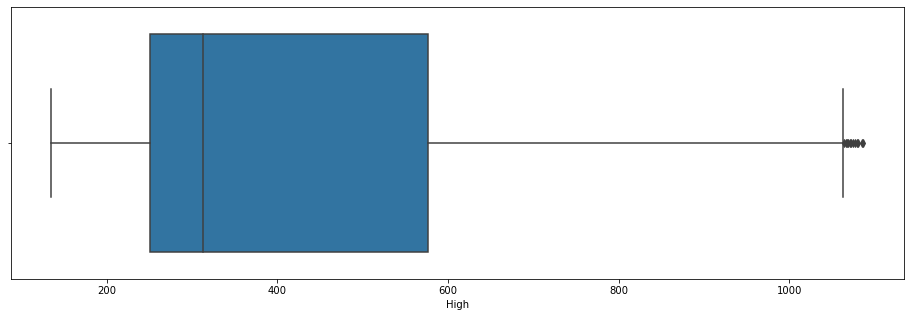

In [7]:
plt.figure(figsize=(16,5))
sns.boxplot(df)

### counting the number of outliers

In [8]:
count = 0
for i in df:
    if(i < np.quantile(df,0.25) -(np.quantile(df,0.75)- np.quantile(df,0.25)) * 1.5 or i>np.quantile(df,0.75)+(np.quantile(df,0.75)- np.quantile(df,0.25)) * 1.5):
        print(i)
        count += 1
print(count)


1073.04
1080.0
1067.08
1075.25
1086.49
1084.98
1081.24
1077.52
1071.72
1068.86
1068.27
1064.84
12


## How to handle outliers?
### 1) Remove
### 2) Replace them with mean/median
### 3) Identify a relationship between features and try to impute values using this relation.

# Stationarity:
## Statistical properties like mean and variance do not change over time.

# Why do we need the data to be stationary?
## Stationary processes are easier to analyze
## Stationarity is assumed by most of the algorithms

<AxesSubplot:xlabel='Date'>

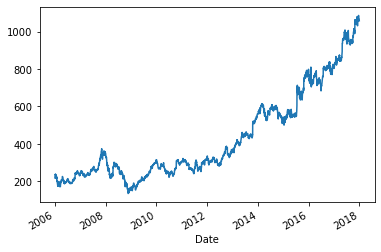

In [9]:
df.plot()

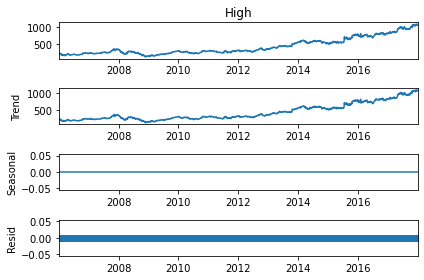

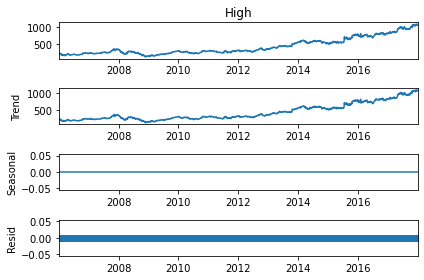

In [10]:
seasonal_decompose(df,period = 1).plot()
#seasonal decompose is used to observe patterns of trend and seasonality. Sometimes it the function forces to produce trend or seasonality in the graphs even when they are not present. So this shouldnt be relied on alone

# How to check for stationarity?
## 1) Visual Inspection by plotting
## 2) Descriptive statistics - divide the dataset into parts and calculate mean/variance
## 3) Augmented Dickey-Fuller test - Test for unit roots in y(t) = alpha*y(t-1)+e

In [11]:
adfuller(df)

(1.1516455250307074,
 0.995634164931128,
 2,
 3016,
 {'1%': -3.4325200511877854,
  '5%': -2.862498789206885,
  '10%': -2.567280388383968},
 19527.074020525768)

# How to remove the trends from dataset?

## 1) First differencing - lag(t) - lag(t-1)
## 2) Model fitting
## 3) Log Transformation
## 4) Power 

# Seasonality

## 1) log or power differencing
## 2) Simple lag differencing
## 3) Model fitting

<AxesSubplot:xlabel='Date'>

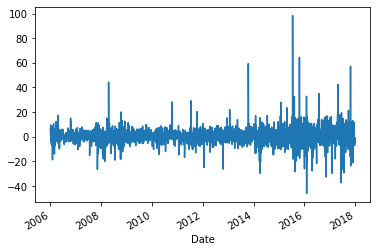

In [12]:
df.diff().dropna().plot()

In [13]:
adfuller(df.diff().dropna())

(-37.89240702599741,
 0.0,
 1,
 3016,
 {'1%': -3.4325200511877854,
  '5%': -2.862498789206885,
  '10%': -2.567280388383968},
 19520.28427013077)

# ACF/PACF

## ACF - Correlation between lag(i) and lag(j) including all the lags in between
## PACF - Correlation between lag(i) and lag(j) not including all the lags in between
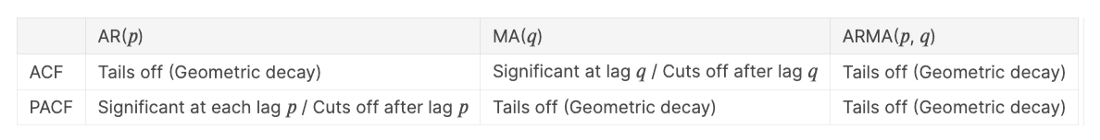



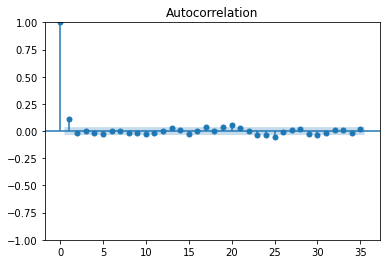

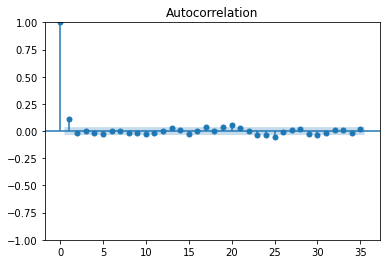

In [14]:
plot_acf(df.diff().dropna())# first difference to remove trend and plotting acf
# one significant lag in acf

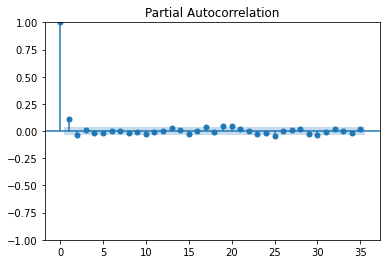

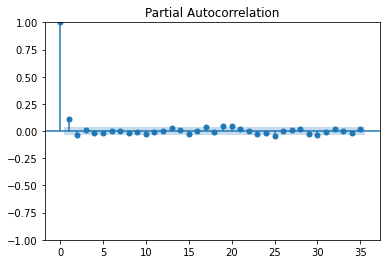

In [15]:
plot_pacf(df.diff().dropna())
# 2 significant lags can be observed in pacf

# Arima Model
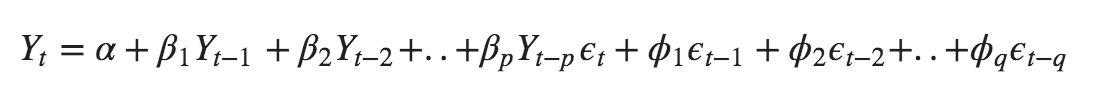

In [16]:
train = df['2006':'2014']
test = df['2015':'2017']

In [17]:
test.values

array([ 535.8 ,  527.99,  521.21,  511.49,  507.5 ,  508.6 ,  500.28,
        508.6 ,  508.26,  509.75,  510.85,  515.61,  521.85,  538.84,
        545.41,  541.5 ,  532.78,  525.69,  515.19,  543.1 ,  536.5 ,
        537.45,  536.75,  530.69,  540.22,  533.88,  541.  ,  541.95,
        548.34,  552.54,  553.  ,  547.55,  546.86,  547.58,  539.3 ,
        539.4 ,  549.57,  560.13,  569.42,  575.99,  580.85,  581.63,
        583.2 ,  582.78,  575.45,  569.76,  564.18,  561.84,  564.36,
        563.75,  560.64,  566.51,  566.96,  567.1 ,  569.64,  581.88,
        580.07,  567.19,  564.07,  562.16,  562.45,  558.5 ,  548.  ,
        545.54,  550.16,  551.5 ,  549.37,  549.85,  553.27,  546.57,
        543.19,  545.23,  539.8 ,  545.8 ,  547.77,  551.  ,  561.17,
        584.7 ,  575.52,  567.83,  565.84,  561.11,  551.22,  556.69,
        552.61,  543.93,  545.2 ,  552.8 ,  553.37,  542.96,  543.84,
        549.69,  550.6 ,  548.34,  553.4 ,  556.06,  557.61,  558.24,
        553.33,  555

In [ ]:
model_arima = ARIMA(train, order = (1,1,2)) #Y(t) - Y(t-1) = a+b(Y(t-1)-Y(t-2))+b(Y(t-2)-Y(t-3))+ phi(e((t-1)-(t-2))
model = model_arima.fit()
print(model.summary())

### By looking at P values, we can infer that p - lag 4 and q - lag4,5 are significant. So we build a model on that

In [18]:
model_arima = ARIMA(train, order = ([4],1,[4,5])) #Y(t) - Y(t-1) = a+b(Y(t-1)-Y(t-2))+b(Y(t-2)-Y(t-3))+ phi(e((t-1)-(t-2))
model = model_arima.fit()
print(model.summary())

C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                 SARIMAX Results                                 
Dep. Variable:                      High   No. Observations:                 2264
Model:             ARIMA([4], 1, [4, 5])   Log Likelihood               -6754.421
Date:                   Mon, 10 Oct 2022   AIC                          13516.842
Time:                           21:07:08   BIC                          13539.740
Sample:                                0   HQIC                         13525.197
                                  - 2264                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L4         -0.8399      0.119     -7.053      0.000      -1.073      -0.607
ma.L4          0.8617      0.112      7.662      0.000       0.641       1.082
ma.L5         -0.0169      0

In [19]:
model.forecast(10)

C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2264    538.557310
2265    538.270243
2266    538.294988
2267    538.750553
2268    538.602226
2269    538.843344
2270    538.822559
2271    538.439915
2272    538.564500
2273    538.361976
Name: predicted_mean, dtype: float64

C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:>

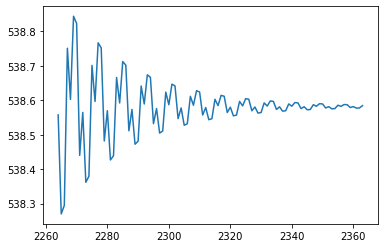

In [20]:
model.forecast(100).plot()

### output still looks unsatisfactory so we should move on to different model by using pmdarima

## ARIMA results parameters:
### 1) Log likelihood - 
### 2) AIC (Akaike Information Criterion)- used for model selection. Lower the value the better. Penalizes the model for adding extra independent variables. 


### K value starts from 2. 2 units of AIC score difference is considered to be significant
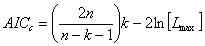


### BIC (Bayesian Information Criterion) - includes the number of rows too



### HQIC (Hannan-Quinn information criterion)


## Ljung box - Q = n(n+2) Σpk2 / (n-k)
### p > 0.05 -> residuals are independent(white noice)
## Heteroskedasticity (H) - p > 0.05 -> no variance in the residuals
## Jarque-Bera - p>0.05 -> data is normally distributed
## Skew - s>0 -> right skew, s<0 -> left skew. Acceptable: -2 to +2
## kurtosis - s>0 -> more values at the centre, s<0 -> lower values at centre. Acceptable -7 to 7
## p < 0.05 -> term is statistically significant

In [25]:
aa = auto_arima(train,stepwise=True,start_p= 2,max_p=5,start_q=2,max_q=5,max_d=3,max_order=5,test='adf',suppress_warnings=True)
aa

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [22]:
model_arima = ARIMA(train, order = (0,1,1)) #Y(t) - Y(t-1) = a+b(Y(t-1)-Y(t-2))+b(Y(t-2)-Y(t-3))+ phi(e((t-1)-(t-2))
model = model_arima.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                   High   No. Observations:                 2264
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -6742.027
Date:                Mon, 10 Oct 2022   AIC                          13488.054
Time:                        21:07:11   BIC                          13499.503
Sample:                             0   HQIC                         13492.232
                               - 2264                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1157      0.018      6.270      0.000       0.080       0.152
sigma2        22.6600      0.214    106.014      0.000      22.241      23.079
Ljung-Box (L1) (Q):                   0.00   Jarque-

C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


C:\Users\dreddy86\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<AxesSubplot:>

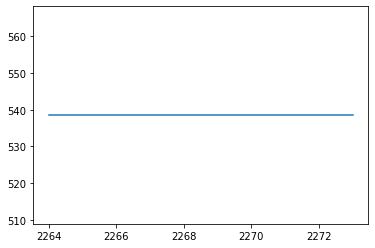

In [23]:
model.forecast(10).plot()

In [16]:
train = google.iloc[:,1:4]
test = google.iloc[:,0]

In [17]:
model = auto_arima(y = test,X = train,stepwise=True,start_p= 2,max_p=5,start_q=2,max_q=5,max_d=3,max_order=5,test='adf',suppress_warnings=True)

In [18]:
#google = google.drop('Name',axis=1)
model

ARIMA(order=(2, 0, 1), scoring_args={}, suppress_warnings=True)